In [1]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import pickle as pickle
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
TARGET_COLS=['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',"clean"]

from sklearn.model_selection import train_test_split


## UNIGRAMS 

In [2]:
import pandas as pd
target_x=pickle.load(open("../pickle/target_x1_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)


[[ 648  137]
 [ 814 2246]]
             precision    recall  f1-score   support

          0       0.44      0.83      0.58       785
          1       0.94      0.73      0.83      3060

avg / total       0.84      0.75      0.77      3845



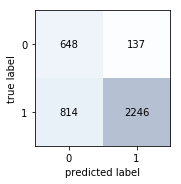

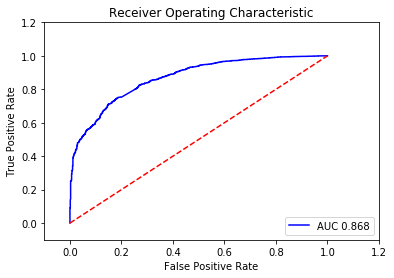

[[2831  683]
 [  81  250]]
             precision    recall  f1-score   support

          0       0.97      0.81      0.88      3514
          1       0.27      0.76      0.40       331

avg / total       0.91      0.80      0.84      3845



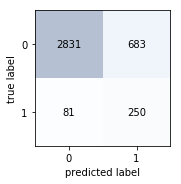

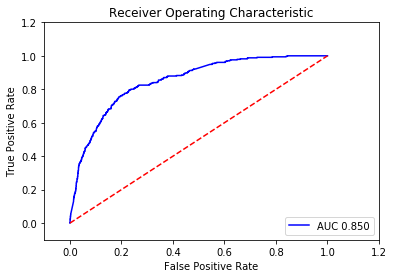

[[1960  196]
 [ 473 1216]]
             precision    recall  f1-score   support

          0       0.81      0.91      0.85      2156
          1       0.86      0.72      0.78      1689

avg / total       0.83      0.83      0.82      3845



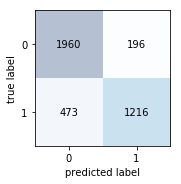

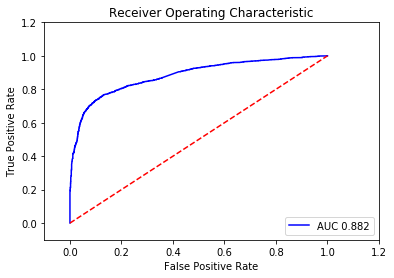

[[3177  564]
 [  34   70]]
             precision    recall  f1-score   support

          0       0.99      0.85      0.91      3741
          1       0.11      0.67      0.19       104

avg / total       0.97      0.84      0.89      3845



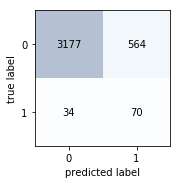

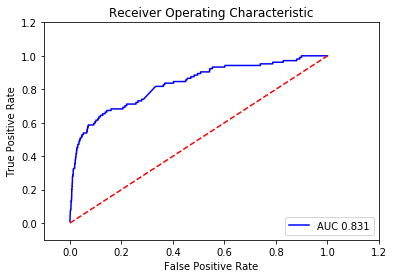

[[1847  464]
 [ 482 1052]]
             precision    recall  f1-score   support

          0       0.79      0.80      0.80      2311
          1       0.69      0.69      0.69      1534

avg / total       0.75      0.75      0.75      3845



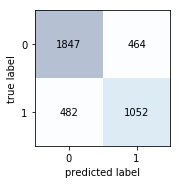

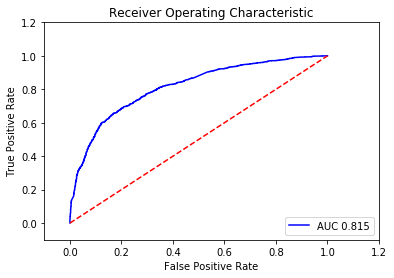

[[2696  890]
 [  88  171]]
             precision    recall  f1-score   support

          0       0.97      0.75      0.85      3586
          1       0.16      0.66      0.26       259

avg / total       0.91      0.75      0.81      3845



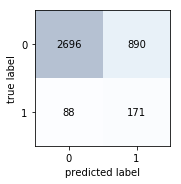

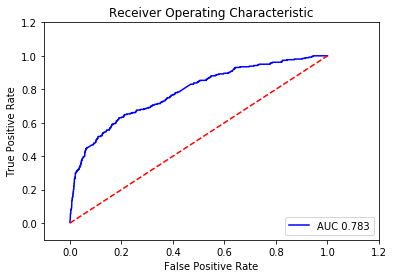

[[2512  739]
 [  75  519]]
             precision    recall  f1-score   support

      False       0.97      0.77      0.86      3251
       True       0.41      0.87      0.56       594

avg / total       0.88      0.79      0.81      3845



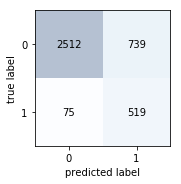

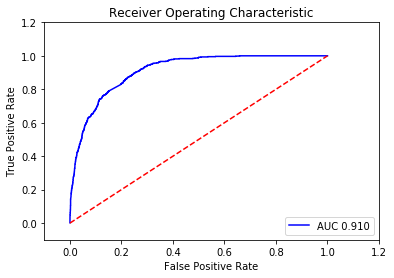

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=LogisticRegression(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## BIGRAMS

In [4]:
target_x=pickle.load(open("../pickle/target_x2_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 152  633]
 [ 326 2734]]
             precision    recall  f1-score   support

          0       0.32      0.19      0.24       785
          1       0.81      0.89      0.85      3060

avg / total       0.71      0.75      0.73      3845



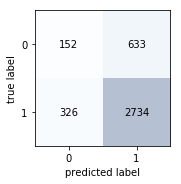

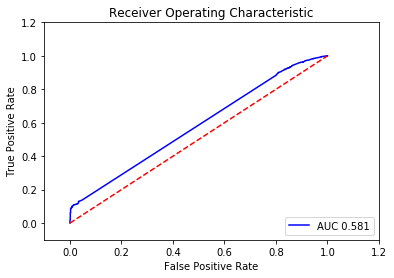

[[3318  218]
 [ 209  100]]
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      3536
          1       0.31      0.32      0.32       309

avg / total       0.89      0.89      0.89      3845



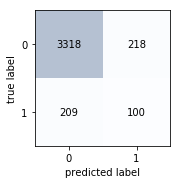

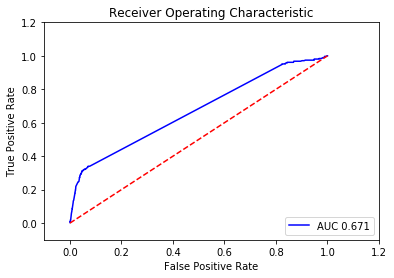

[[2075   67]
 [1370  333]]
             precision    recall  f1-score   support

          0       0.60      0.97      0.74      2142
          1       0.83      0.20      0.32      1703

avg / total       0.70      0.63      0.55      3845



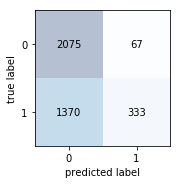

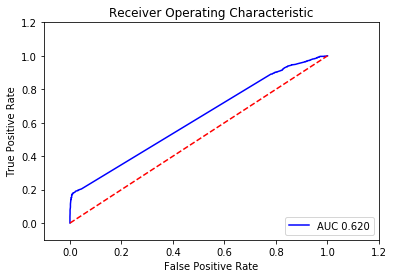

[[ 798 2949]
 [  13   85]]
             precision    recall  f1-score   support

          0       0.98      0.21      0.35      3747
          1       0.03      0.87      0.05        98

avg / total       0.96      0.23      0.34      3845



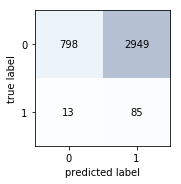

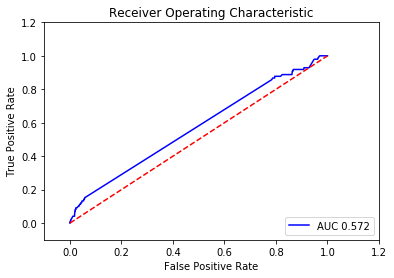

[[2149  124]
 [1269  303]]
             precision    recall  f1-score   support

          0       0.63      0.95      0.76      2273
          1       0.71      0.19      0.30      1572

avg / total       0.66      0.64      0.57      3845



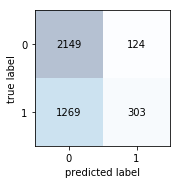

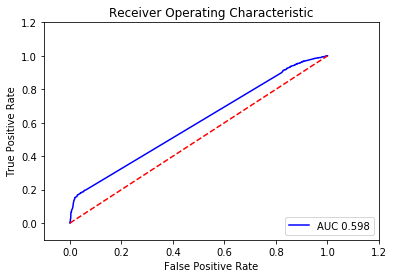

[[ 667 2896]
 [  32  250]]
             precision    recall  f1-score   support

          0       0.95      0.19      0.31      3563
          1       0.08      0.89      0.15       282

avg / total       0.89      0.24      0.30      3845



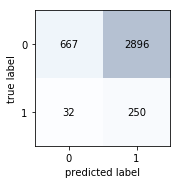

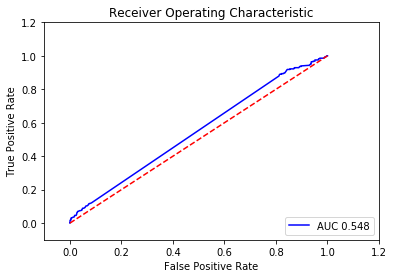

[[3009  320]
 [ 409  107]]
             precision    recall  f1-score   support

      False       0.88      0.90      0.89      3329
       True       0.25      0.21      0.23       516

avg / total       0.80      0.81      0.80      3845



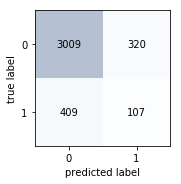

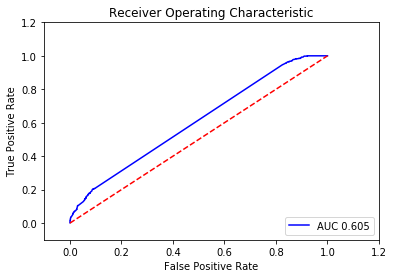

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=LogisticRegression(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## CHARNGRAM

In [6]:
target_x=pickle.load(open("../pickle/target_x3_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 603  182]
 [ 509 2551]]
             precision    recall  f1-score   support

          0       0.54      0.77      0.64       785
          1       0.93      0.83      0.88      3060

avg / total       0.85      0.82      0.83      3845



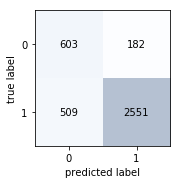

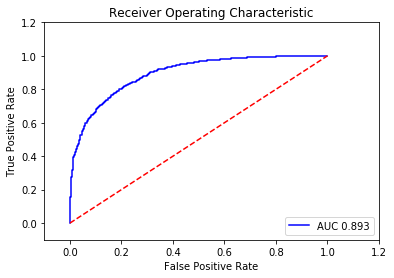

[[3101  414]
 [  86  244]]
             precision    recall  f1-score   support

          0       0.97      0.88      0.93      3515
          1       0.37      0.74      0.49       330

avg / total       0.92      0.87      0.89      3845



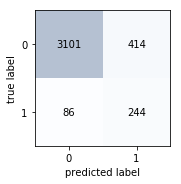

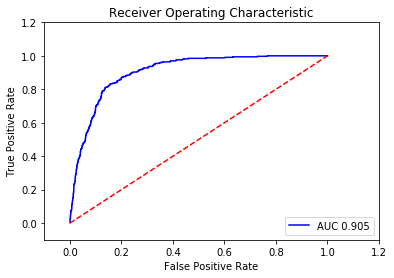

[[1955  207]
 [ 391 1292]]
             precision    recall  f1-score   support

          0       0.83      0.90      0.87      2162
          1       0.86      0.77      0.81      1683

avg / total       0.85      0.84      0.84      3845



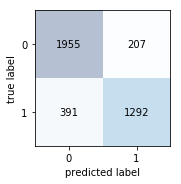

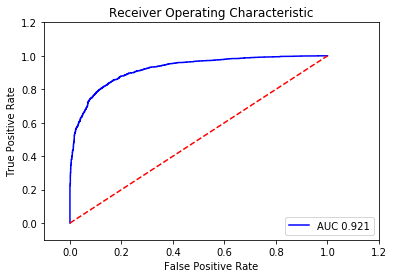

[[3628  120]
 [  31   66]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      3748
          1       0.35      0.68      0.47        97

avg / total       0.98      0.96      0.97      3845



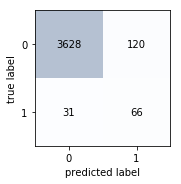

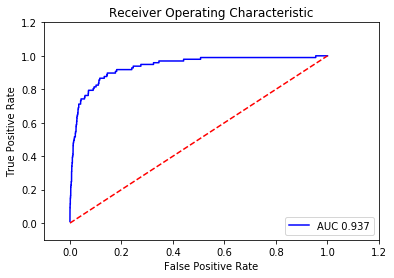

[[1900  411]
 [ 448 1086]]
             precision    recall  f1-score   support

          0       0.81      0.82      0.82      2311
          1       0.73      0.71      0.72      1534

avg / total       0.78      0.78      0.78      3845



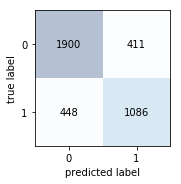

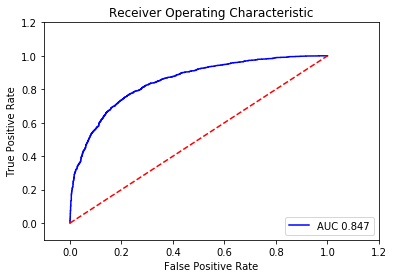

[[3274  283]
 [  79  209]]
             precision    recall  f1-score   support

          0       0.98      0.92      0.95      3557
          1       0.42      0.73      0.54       288

avg / total       0.94      0.91      0.92      3845



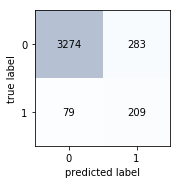

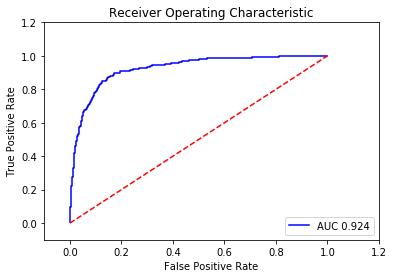

[[2836  387]
 [  93  529]]
             precision    recall  f1-score   support

      False       0.97      0.88      0.92      3223
       True       0.58      0.85      0.69       622

avg / total       0.91      0.88      0.88      3845



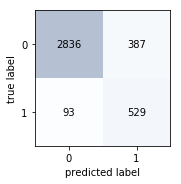

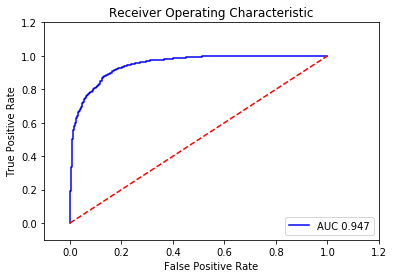

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=LogisticRegression(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## SELECTED FEATURES

In [8]:
target_x=pickle.load(open("../pickle/target_x4_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 411  374]
 [ 828 2232]]
             precision    recall  f1-score   support

          0       0.33      0.52      0.41       785
          1       0.86      0.73      0.79      3060

avg / total       0.75      0.69      0.71      3845



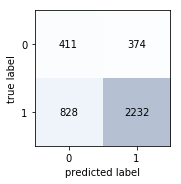

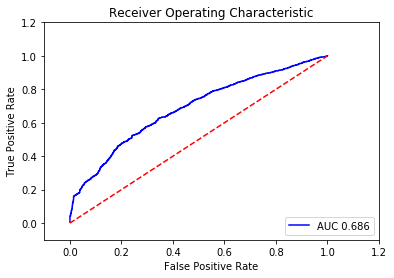

[[1924 1599]
 [  88  234]]
             precision    recall  f1-score   support

          0       0.96      0.55      0.70      3523
          1       0.13      0.73      0.22       322

avg / total       0.89      0.56      0.66      3845



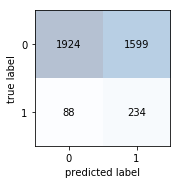

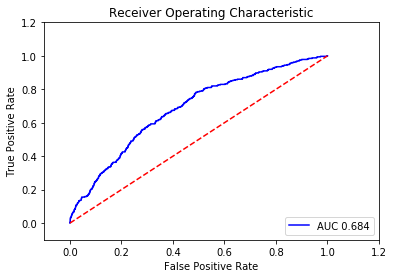

[[ 986 1174]
 [ 490 1195]]
             precision    recall  f1-score   support

          0       0.67      0.46      0.54      2160
          1       0.50      0.71      0.59      1685

avg / total       0.60      0.57      0.56      3845



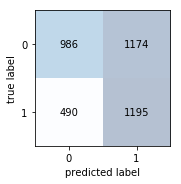

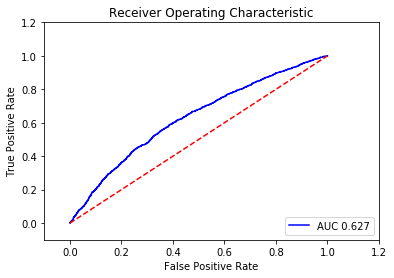

[[1403 2345]
 [  29   68]]
             precision    recall  f1-score   support

          0       0.98      0.37      0.54      3748
          1       0.03      0.70      0.05        97

avg / total       0.96      0.38      0.53      3845



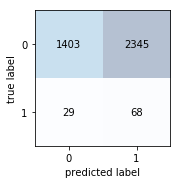

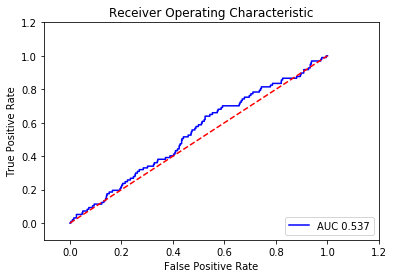

[[ 921 1322]
 [ 396 1206]]
             precision    recall  f1-score   support

          0       0.70      0.41      0.52      2243
          1       0.48      0.75      0.58      1602

avg / total       0.61      0.55      0.55      3845



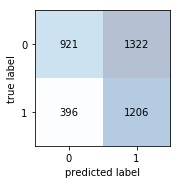

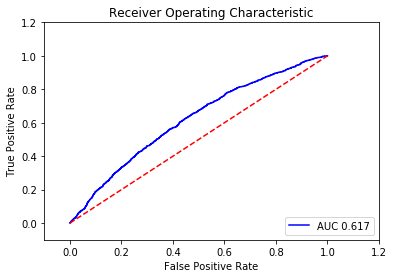

[[1482 2088]
 [  89  186]]
             precision    recall  f1-score   support

          0       0.94      0.42      0.58      3570
          1       0.08      0.68      0.15       275

avg / total       0.88      0.43      0.55      3845



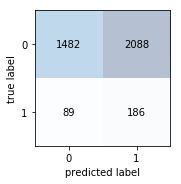

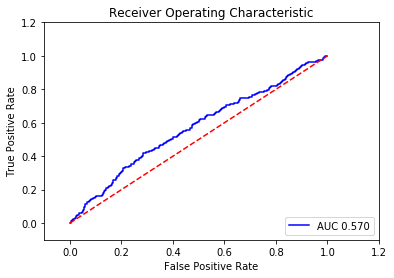

[[2206 1020]
 [ 255  364]]
             precision    recall  f1-score   support

      False       0.90      0.68      0.78      3226
       True       0.26      0.59      0.36       619

avg / total       0.79      0.67      0.71      3845



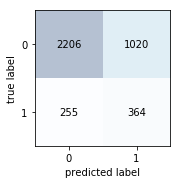

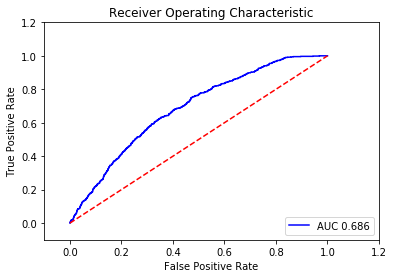

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=LogisticRegression(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## WORDVECTORS - GLOVE

In [10]:
target_x=pickle.load(open("../pickle/target_x5_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

print(target_x.shape)
print
X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

(19225, 3)


[[ 771    0]
 [3074    0]]
             precision    recall  f1-score   support

          0       0.20      1.00      0.33       771
          1       0.00      0.00      0.00      3074

avg / total       0.04      0.20      0.07      3845



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


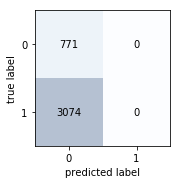

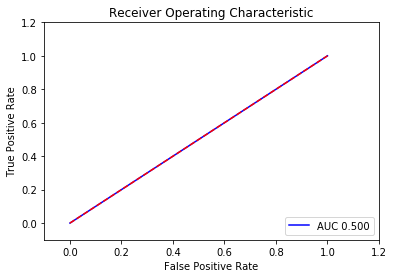

[[3529    0]
 [ 316    0]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      3529
          1       0.00      0.00      0.00       316

avg / total       0.84      0.92      0.88      3845



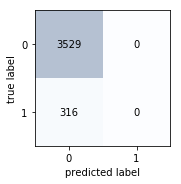

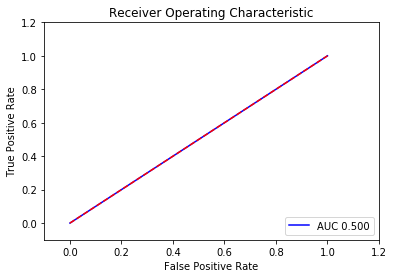

[[2221    0]
 [1624    0]]
             precision    recall  f1-score   support

          0       0.58      1.00      0.73      2221
          1       0.00      0.00      0.00      1624

avg / total       0.33      0.58      0.42      3845



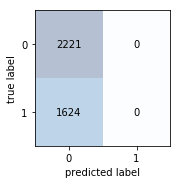

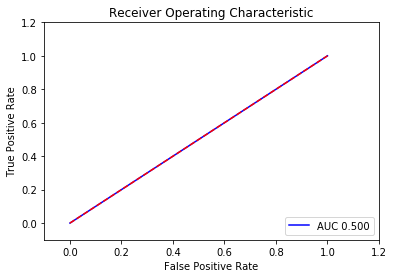

[[3755    0]
 [  90    0]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      3755
          1       0.00      0.00      0.00        90

avg / total       0.95      0.98      0.97      3845



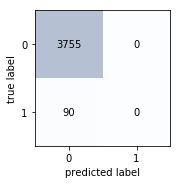

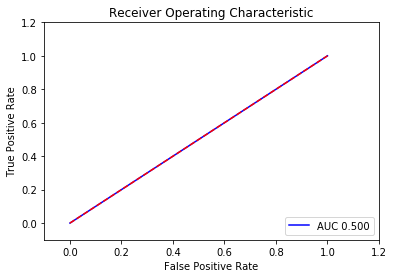

[[2282    0]
 [1563    0]]
             precision    recall  f1-score   support

          0       0.59      1.00      0.74      2282
          1       0.00      0.00      0.00      1563

avg / total       0.35      0.59      0.44      3845



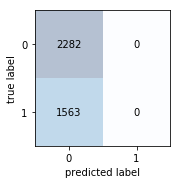

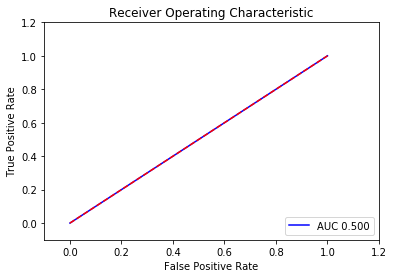

[[3561    0]
 [ 284    0]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      3561
          1       0.00      0.00      0.00       284

avg / total       0.86      0.93      0.89      3845



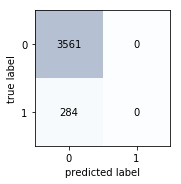

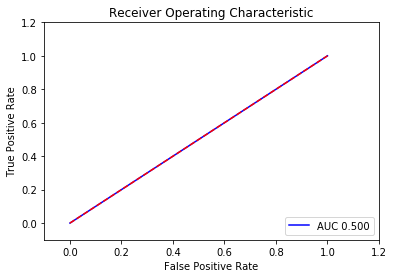

[[3227    0]
 [ 618    0]]
             precision    recall  f1-score   support

      False       0.84      1.00      0.91      3227
       True       0.00      0.00      0.00       618

avg / total       0.70      0.84      0.77      3845



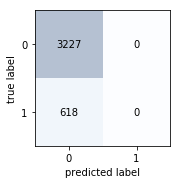

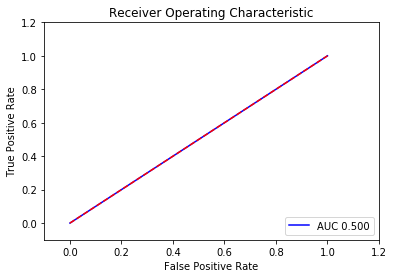

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=LogisticRegression(class_weight="balanced")
#dfindex=None
#dftoxic=None
#dfstoxic=None
#dfobscene=None
#dfthreat=None
#dfinsult=None
#dfih=None
for i, j in enumerate(TARGET_COLS):
    
#     X_train=(pd.DataFrame(X_train.toarray()))
#     X_valid=(pd.DataFrame(X_valid.toarray()))
#     if i==0:
#         dfindex=((X_valid).iloc[:,0])
#     X_train=X_train.drop(X_train.columns[[0]], axis=1)
#     X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_bigrams,train_charngrams,train_unigrams,train_feats[SELECTED_COLS])).tocsr()

In [13]:
target_x=pickle.load(open("../pickle/target_x6_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 617  168]
 [ 512 2548]]
             precision    recall  f1-score   support

          0       0.55      0.79      0.64       785
          1       0.94      0.83      0.88      3060

avg / total       0.86      0.82      0.83      3845



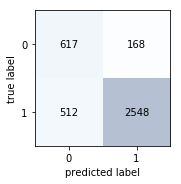

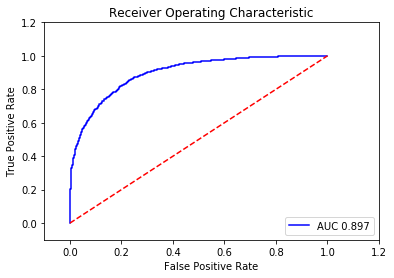

[[3060  446]
 [  95  244]]
             precision    recall  f1-score   support

          0       0.97      0.87      0.92      3506
          1       0.35      0.72      0.47       339

avg / total       0.92      0.86      0.88      3845



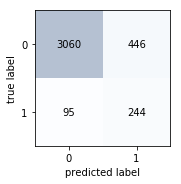

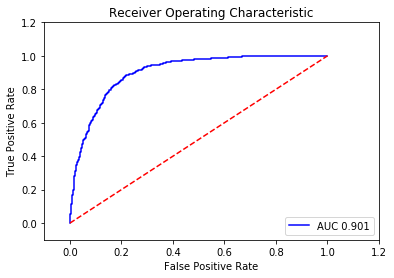

[[1960  142]
 [ 597 1146]]
             precision    recall  f1-score   support

          0       0.77      0.93      0.84      2102
          1       0.89      0.66      0.76      1743

avg / total       0.82      0.81      0.80      3845



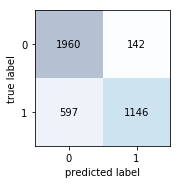

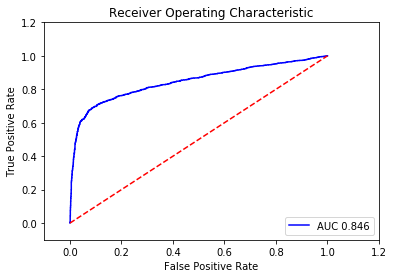

[[3620  132]
 [  32   61]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.98      3752
          1       0.32      0.66      0.43        93

avg / total       0.97      0.96      0.96      3845



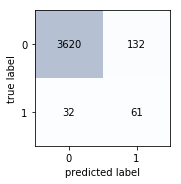

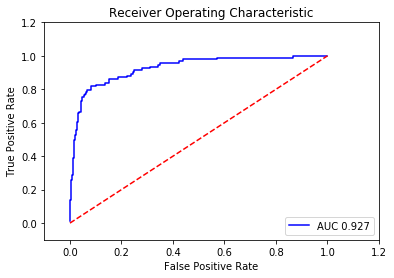

[[1827  446]
 [ 460 1112]]
             precision    recall  f1-score   support

          0       0.80      0.80      0.80      2273
          1       0.71      0.71      0.71      1572

avg / total       0.76      0.76      0.76      3845



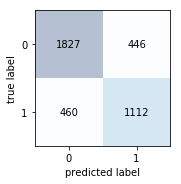

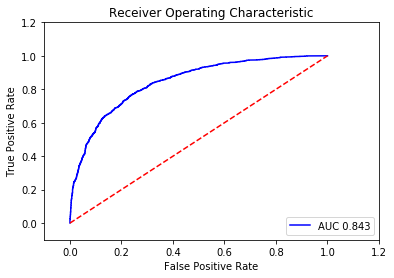

[[3240  294]
 [  94  217]]
             precision    recall  f1-score   support

          0       0.97      0.92      0.94      3534
          1       0.42      0.70      0.53       311

avg / total       0.93      0.90      0.91      3845



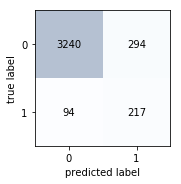

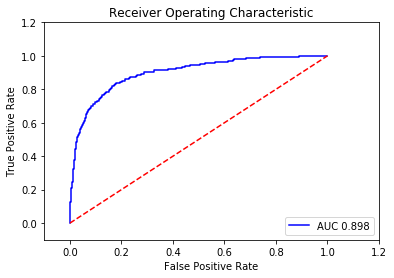

[[2864  356]
 [  84  541]]
             precision    recall  f1-score   support

      False       0.97      0.89      0.93      3220
       True       0.60      0.87      0.71       625

avg / total       0.91      0.89      0.89      3845



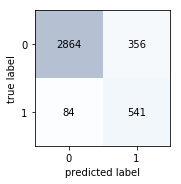

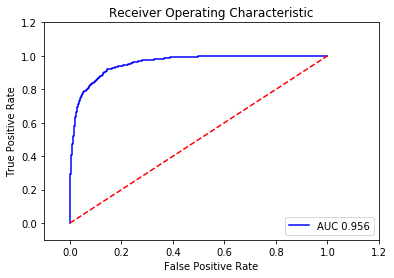

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=LogisticRegression(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_bigrams,train_unigrams)).tocsr()

In [15]:
target_x=pickle.load(open("../pickle/target_x7_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 639  146]
 [ 786 2274]]
             precision    recall  f1-score   support

          0       0.45      0.81      0.58       785
          1       0.94      0.74      0.83      3060

avg / total       0.84      0.76      0.78      3845



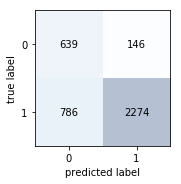

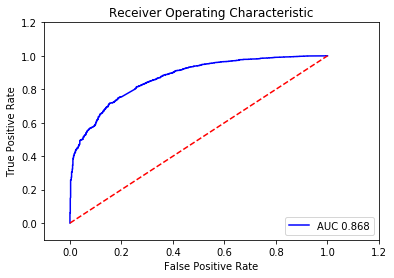

[[2910  631]
 [  63  241]]
             precision    recall  f1-score   support

          0       0.98      0.82      0.89      3541
          1       0.28      0.79      0.41       304

avg / total       0.92      0.82      0.86      3845



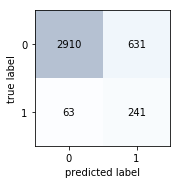

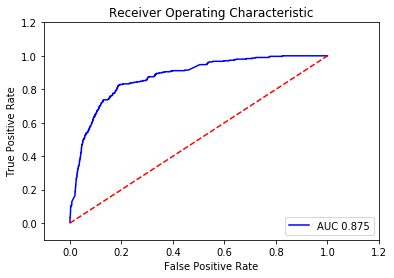

[[1922  189]
 [ 452 1282]]
             precision    recall  f1-score   support

          0       0.81      0.91      0.86      2111
          1       0.87      0.74      0.80      1734

avg / total       0.84      0.83      0.83      3845



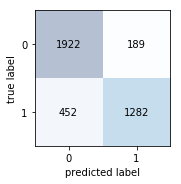

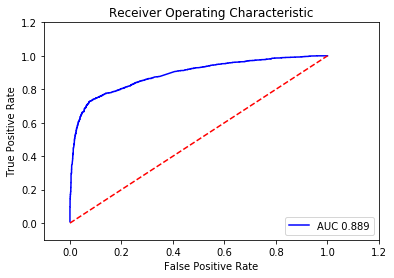

[[3275  466]
 [  41   63]]
             precision    recall  f1-score   support

          0       0.99      0.88      0.93      3741
          1       0.12      0.61      0.20       104

avg / total       0.96      0.87      0.91      3845



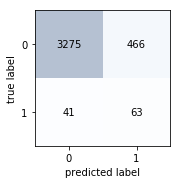

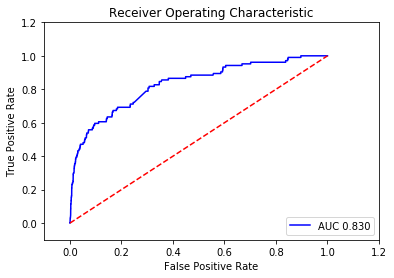

[[1823  450]
 [ 537 1035]]
             precision    recall  f1-score   support

          0       0.77      0.80      0.79      2273
          1       0.70      0.66      0.68      1572

avg / total       0.74      0.74      0.74      3845



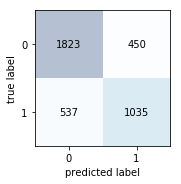

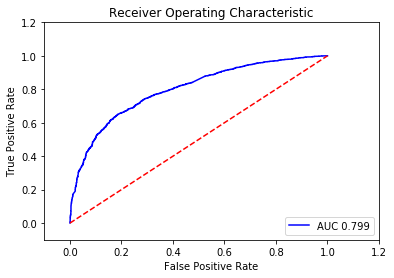

[[2752  818]
 [ 106  169]]
             precision    recall  f1-score   support

          0       0.96      0.77      0.86      3570
          1       0.17      0.61      0.27       275

avg / total       0.91      0.76      0.81      3845



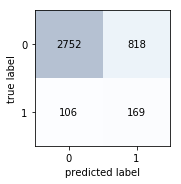

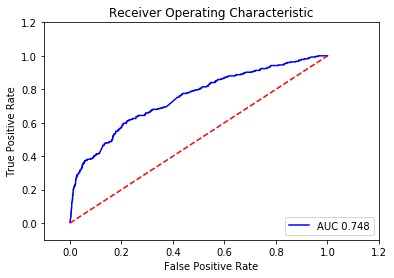

[[2490  701]
 [  78  576]]
             precision    recall  f1-score   support

      False       0.97      0.78      0.86      3191
       True       0.45      0.88      0.60       654

avg / total       0.88      0.80      0.82      3845



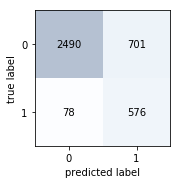

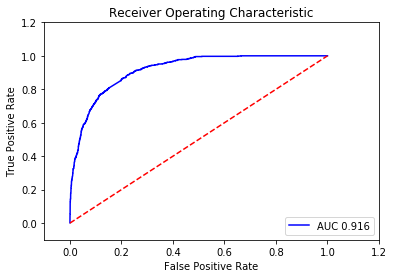

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=LogisticRegression(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_unigrams, train_charngrams)).tocsr()

In [17]:
target_x=pickle.load(open("../pickle/target_x8_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 618  167]
 [ 517 2543]]
             precision    recall  f1-score   support

          0       0.54      0.79      0.64       785
          1       0.94      0.83      0.88      3060

avg / total       0.86      0.82      0.83      3845



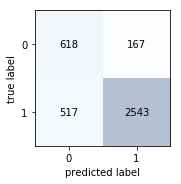

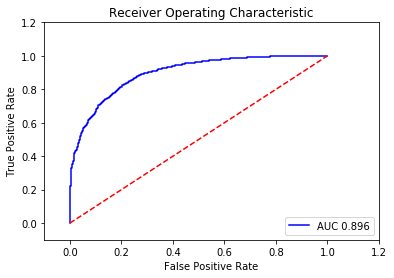

[[3078  442]
 [ 105  220]]
             precision    recall  f1-score   support

          0       0.97      0.87      0.92      3520
          1       0.33      0.68      0.45       325

avg / total       0.91      0.86      0.88      3845



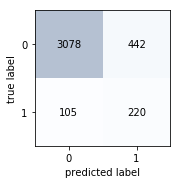

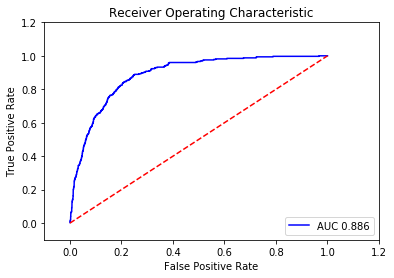

[[2022  171]
 [ 389 1263]]
             precision    recall  f1-score   support

          0       0.84      0.92      0.88      2193
          1       0.88      0.76      0.82      1652

avg / total       0.86      0.85      0.85      3845



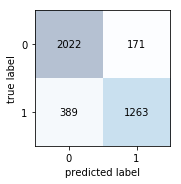

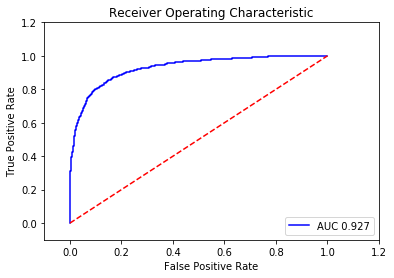

[[3604  138]
 [  42   61]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.98      3742
          1       0.31      0.59      0.40       103

avg / total       0.97      0.95      0.96      3845



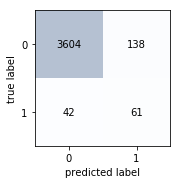

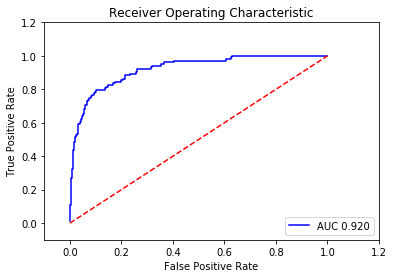

[[1838  417]
 [ 424 1166]]
             precision    recall  f1-score   support

          0       0.81      0.82      0.81      2255
          1       0.74      0.73      0.73      1590

avg / total       0.78      0.78      0.78      3845



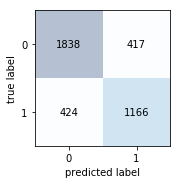

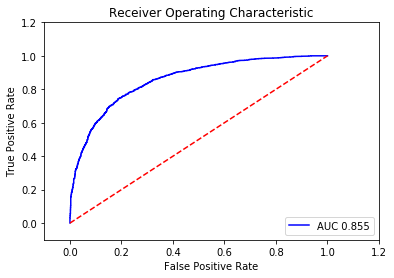

[[3255  326]
 [  91  173]]
             precision    recall  f1-score   support

          0       0.97      0.91      0.94      3581
          1       0.35      0.66      0.45       264

avg / total       0.93      0.89      0.91      3845



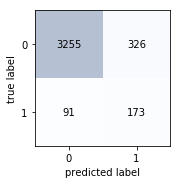

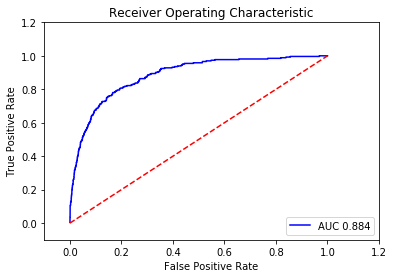

[[2862  362]
 [  82  539]]
             precision    recall  f1-score   support

      False       0.97      0.89      0.93      3224
       True       0.60      0.87      0.71       621

avg / total       0.91      0.88      0.89      3845



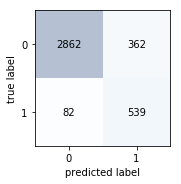

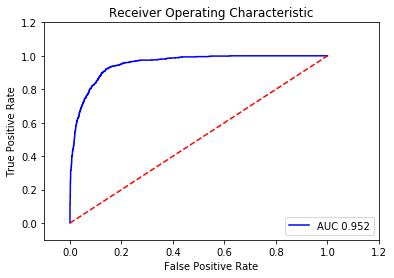

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=LogisticRegression(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_unigrams, train_charngrams,train_bigrams)).tocsr()

In [19]:
target_x=pickle.load(open("../pickle/target_x9_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
y_test.shape

(3076, 7)

[[ 618  167]
 [ 517 2543]]
             precision    recall  f1-score   support

          0       0.54      0.79      0.64       785
          1       0.94      0.83      0.88      3060

avg / total       0.86      0.82      0.83      3845



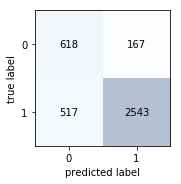

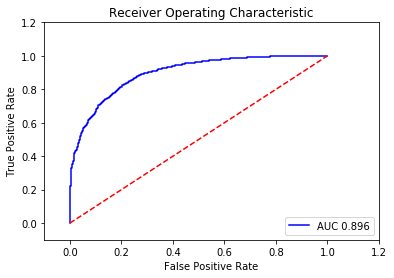

[[3095  430]
 [  93  227]]
             precision    recall  f1-score   support

          0       0.97      0.88      0.92      3525
          1       0.35      0.71      0.46       320

avg / total       0.92      0.86      0.88      3845



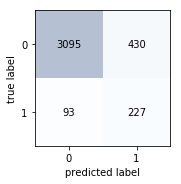

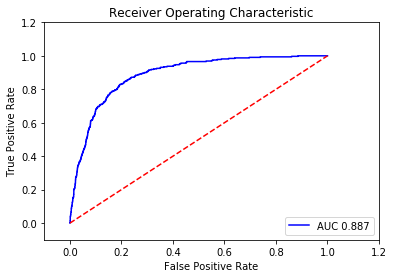

[[1931  195]
 [ 382 1337]]
             precision    recall  f1-score   support

          0       0.83      0.91      0.87      2126
          1       0.87      0.78      0.82      1719

avg / total       0.85      0.85      0.85      3845



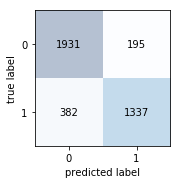

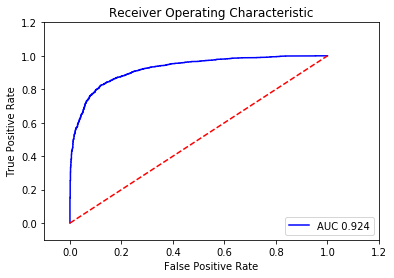

[[3635  130]
 [  31   49]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      3765
          1       0.27      0.61      0.38        80

avg / total       0.98      0.96      0.97      3845



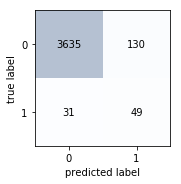

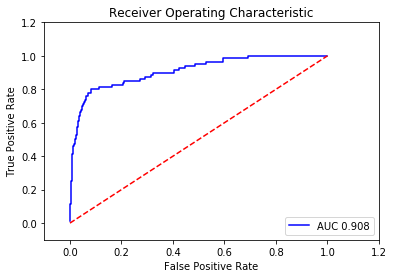

[[1814  451]
 [ 444 1136]]
             precision    recall  f1-score   support

          0       0.80      0.80      0.80      2265
          1       0.72      0.72      0.72      1580

avg / total       0.77      0.77      0.77      3845



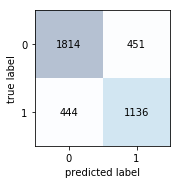

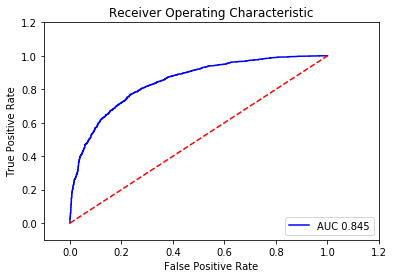

[[3276  284]
 [  87  198]]
             precision    recall  f1-score   support

          0       0.97      0.92      0.95      3560
          1       0.41      0.69      0.52       285

avg / total       0.93      0.90      0.91      3845



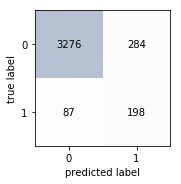

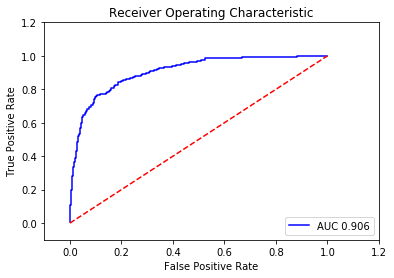

[[2892  376]
 [  84  493]]
             precision    recall  f1-score   support

      False       0.97      0.88      0.93      3268
       True       0.57      0.85      0.68       577

avg / total       0.91      0.88      0.89      3845



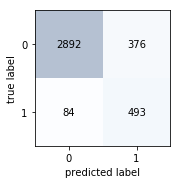

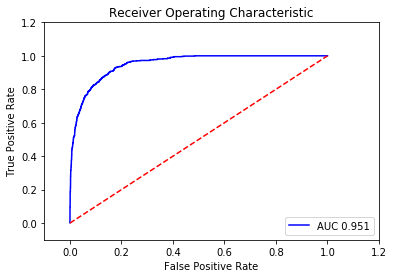

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=LogisticRegression(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   
